<a href="https://colab.research.google.com/github/myroslava-bt/python_for_ds_tasks/blob/main/%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [ ]:
!pip install pandas matplotlib numpy

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [ ]:
##в першому графіку лінія дотикається рамки, в другому ні, також в першому по осі х написані місяці буквами, в другому числами. Мені більше подобається другий, бо дата написана точніше.

/tmp/ipython-input-9-3614345759.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df['count'].resample('M').mean()


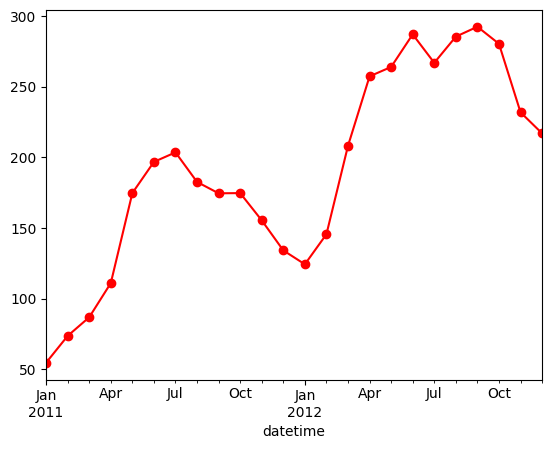

In [9]:
monthly_mean = df['count'].resample('M').mean()
monthly_mean.plot(marker='o', color='red')
plt.show()

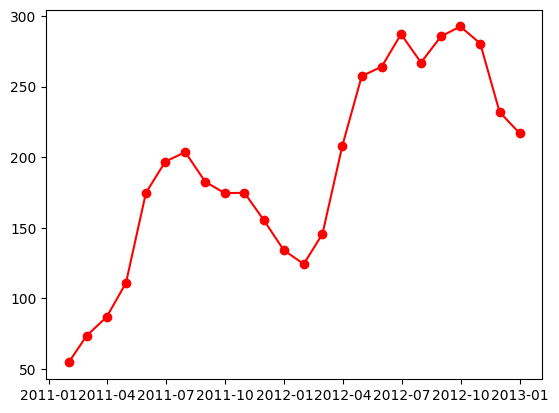

In [10]:
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', color='red')
plt.show()

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [ ]:
##1.Продажі були стабільніше в другому тижні.

In [11]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

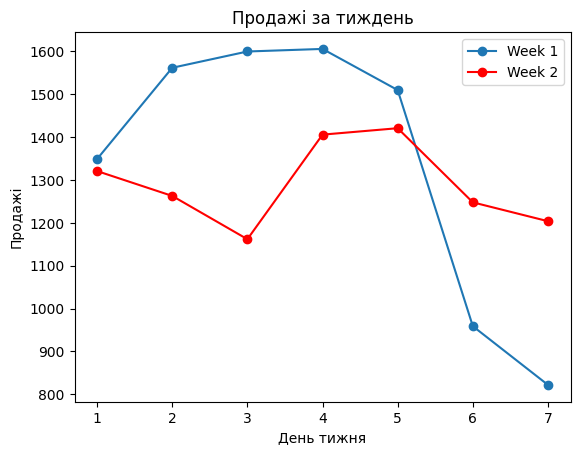

In [21]:
plt.plot(days, sales_week1, label='Week 1', marker='o')
plt.plot(days, sales_week2, label='Week 2', marker='o', color='red')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.title('Продажі за тиждень')
plt.legend()
plt.show()

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

/tmp/ipython-input-45-211523560.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_temp = df['temp'].resample('M').mean()


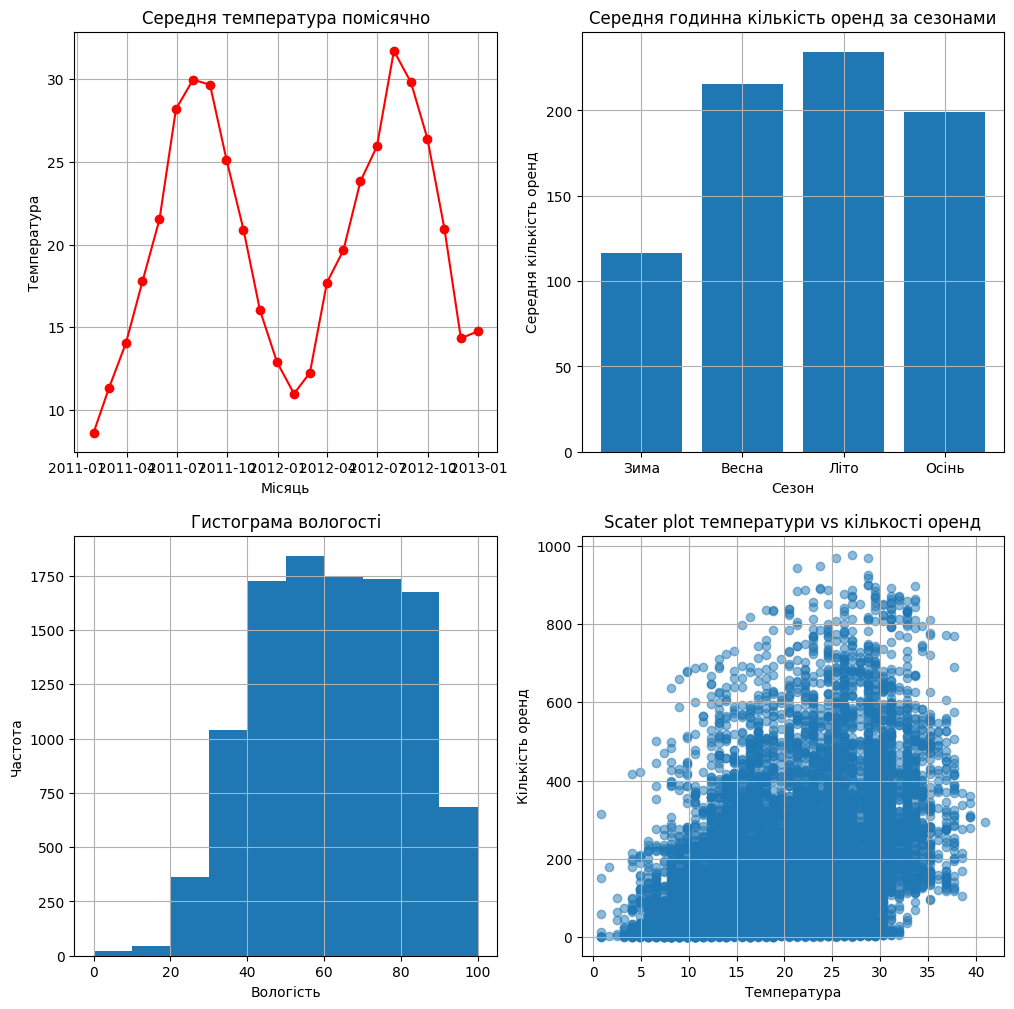

In [45]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
monthly_mean_temp = df['temp'].resample('M').mean()
plt.plot(monthly_mean_temp.index, monthly_mean_temp.values, marker='o', color='red')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура')
plt.grid(True)

plt.subplot(2, 2, 2)
season_avg = df.groupby('season')['count'].mean()
plt.bar(season_avg.index, season_avg.values)
plt.title('Середня годинна кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')
plt.xticks([1, 2, 3, 4], ['Зима', 'Весна', 'Літо', 'Осінь'])
plt.grid(True)

plt.subplot(2, 2, 3)
humidity = df['humidity'].values
plt.hist(humidity, bins=10)
plt.title('Гистограма вологості')
plt.xlabel('Вологість')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.5)
plt.title('Scater plot температури vs кількості оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.grid(True)

plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [ ]:
##1. Можна краще розуміти деталі графіку. 2.Візуально показати діапазон, зробити графік більш читабельним. 3. Наприклад, можна писати коротке пояснення.

/tmp/ipython-input-53-3143876345.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = df['count'].resample('M').agg(['mean', 'min', 'max'])


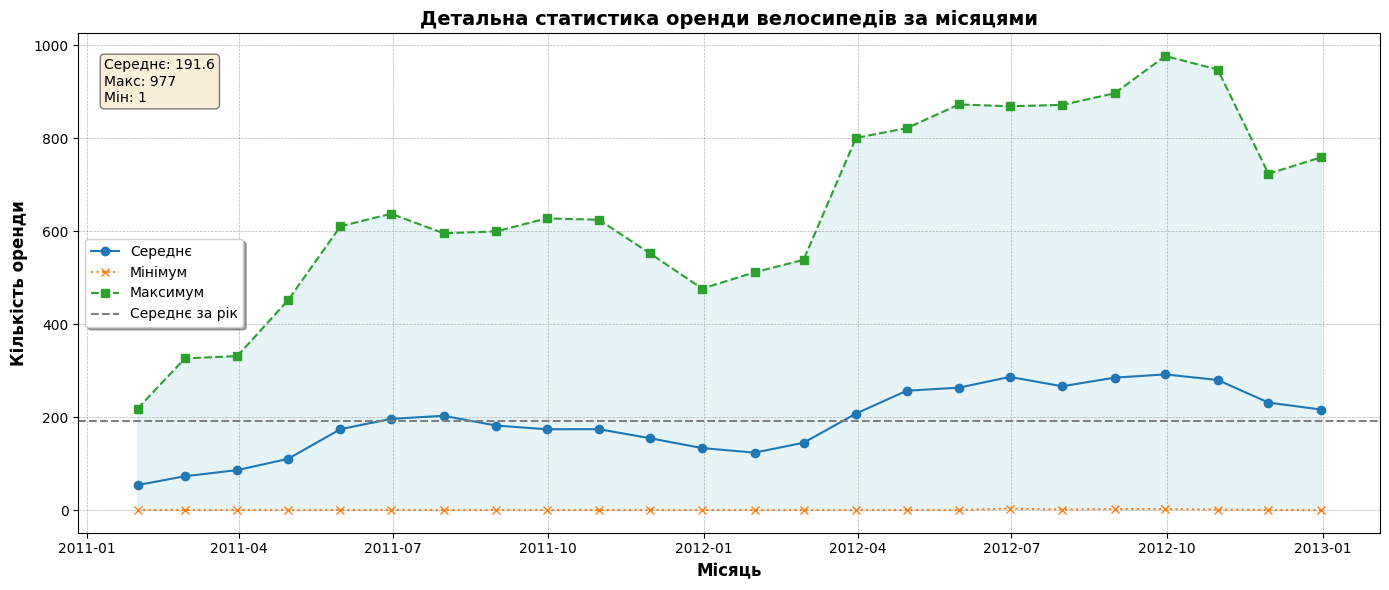

In [53]:
monthly_stats = df['count'].resample('M').agg(['mean', 'min', 'max'])

plt.figure(figsize=(14, 6))

plt.plot(monthly_stats.index, monthly_stats['mean'], label='Середнє', linestyle='-', marker='o')
plt.plot(monthly_stats.index, monthly_stats['min'], label='Мінімум', linestyle=':', marker='x')
plt.plot(monthly_stats.index, monthly_stats['max'], label='Максимум', linestyle='--', marker='s')

plt.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], color='lightblue', alpha=0.3)

plt.axhline(df['count'].mean(), color='gray', linestyle='--', linewidth=1.5, label='Середнє за рік')

textstr = f"Середнє: {df['count'].mean():.1f}\nМакс: {df['count'].max()}\nМін: {df['count'].min()}"
plt.text(0.02, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

max_idx = monthly_stats['max'].idxmax()
max_val = monthly_stats['max'].max()

plt.title('Детальна статистика оренди велосипедів за місяцями', fontsize=14, fontweight='bold')
plt.xlabel('Місяць', fontsize=12, fontweight='bold')
plt.ylabel('Кількість оренди', fontsize=12, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(shadow=True)
plt.tight_layout()
plt.show()